# GRIP : The Sparks Foundation

## Data Science and Business Analytics Intern

### Author : Savan Kalathiya

#### Task 1 : Prediction by using Supervised Machine Learning

###### in this task we have to predict the percentage score of student based on no. of study hours & score if student student studies 9.25 Hours/Day. it has mainly two variables:
###### 1) No.of hours studied (feature)
###### 2) Percentage Score (Target Variable)

In [27]:
# Importing all required libraries

import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import sklearn

In [26]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [41]:
import matplotlib.pyplot as plt
import sklearn

In [4]:
# Reading the data from provided data set

df = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

In [5]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [6]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [7]:
## checking the shape of the data

df.shape

(25, 2)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [9]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [10]:
## checking if there ia any missing value in the data set or not

df.isnull().sum()

Hours     0
Scores    0
dtype: int64

<AxesSubplot:>

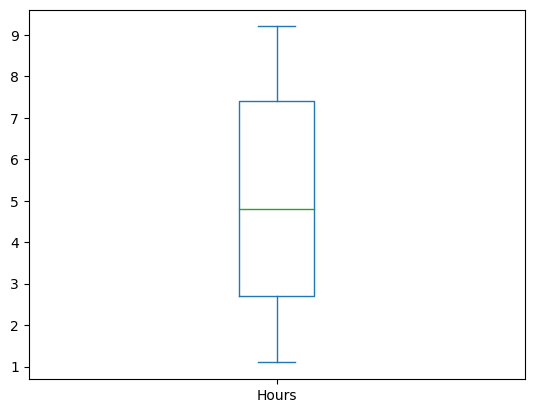

In [11]:
## checking if there is any outliers in the data set or not


df['Hours'].plot.box()

<AxesSubplot:>

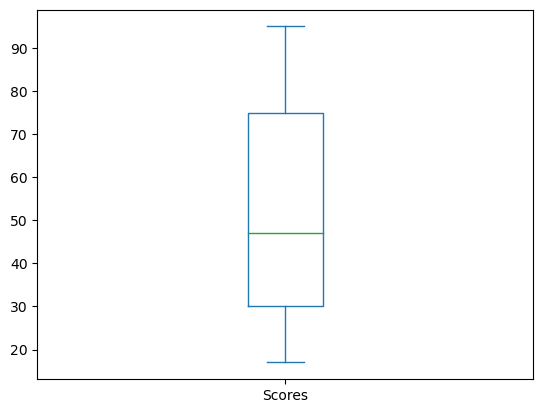

In [12]:
df['Scores'].plot.box()

#### From above plot we can say that there is no outliers in the dataset

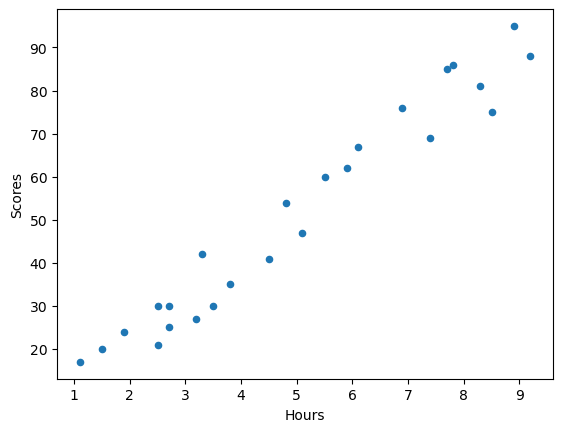

In [13]:
## plotting the data into scatter plot to see the relationship


df.plot(kind = 'scatter', x = 'Hours', y = 'Scores')
plt.show()

In [14]:
## above plot shows that fairely linear relationship is there
## let's check the relationship with correlation matrix


df.corr(method = 'pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [15]:
df.corr(method = 'spearman')

,Hours,Scores
Hours,1.000000,0.971891
Scores,0.971891,1.000000


####  Positive correlation value shows that linear relationship is there. 

# Linear Regression

In [42]:
x = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

In [64]:
### Let's split the dataset into Testing and Training


from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [65]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

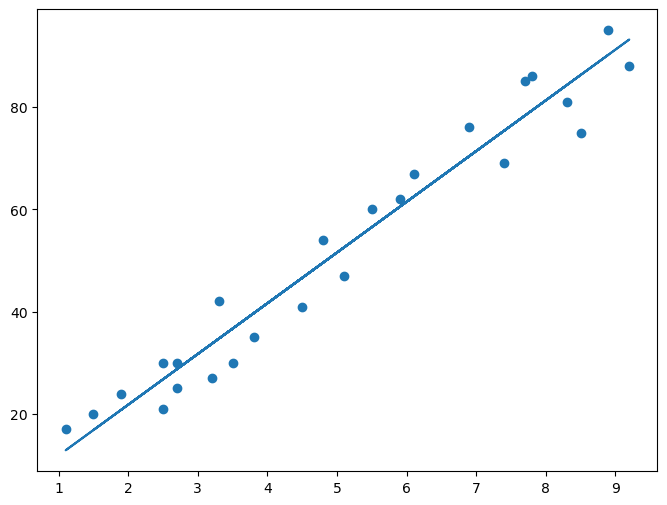

In [66]:
m = reg.coef_
c = reg.intercept_
line = m*x+c
plt.scatter(x, y)
plt.plot(x, line)
plt.show()

### Visualising the model

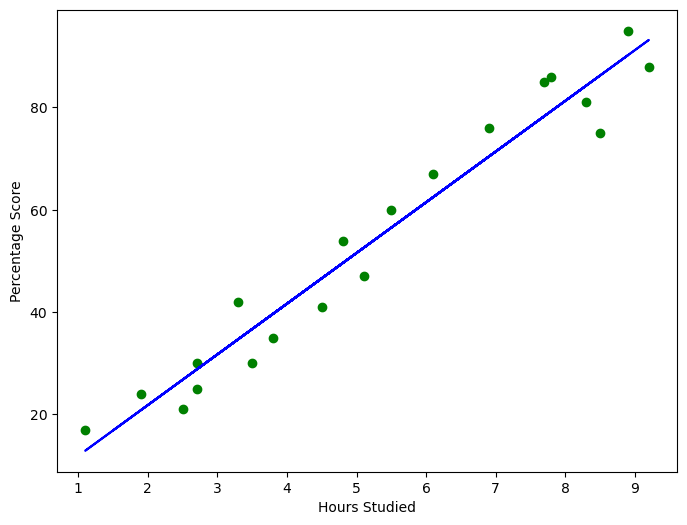

In [67]:
## plotting the Training data


plt.rcParams["figure.figsize"]=[8,6]
plt.scatter(x_train, y_train, color='green' )
plt.plot(x, line, color='blue')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

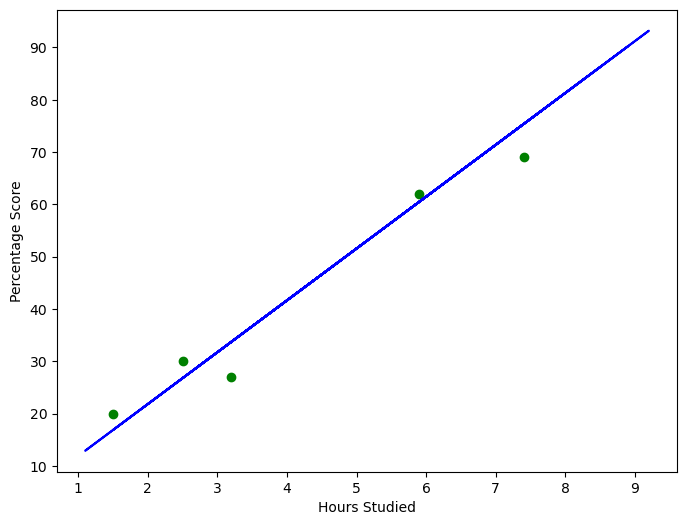

In [68]:
## plotting the Testing data


plt.rcParams["figure.figsize"]=[8,6]
plt.scatter(x_test, y_test, color='green' )
plt.plot(x, line, color='blue')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

### Making the prediction

In [69]:
print(x_test)
y_pred = reg.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [70]:
y_test

array([20, 27, 69, 30, 62], dtype=int64)

In [71]:
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [72]:
## Comparing actual vs predicted data

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### What will be the predicted score if a student studies 9.25 Hours/Day

In [75]:
new_hours = 9.25
new_pred=reg.predict([[new_hours]])
print("Predicted Score = {}".format(new_pred[0]))

Predicted Score = 93.69173248737539


## Model Evaluation

In [77]:
### for evaluating the model check mean absolute error

from sklearn import metrics
from sklearn.metrics import r2_score
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('R2 Score', r2_score(y_test, y_pred))

Mean Absolute Error: 4.183859899002982
R2 Score 0.9454906892105354


In [ ]:
##